# **Raytracing**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Ray-sphere intersection

(-0.025, 0.525, -0.025, 0.525)

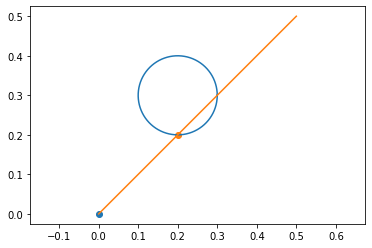

In [ ]:
# Sphere parameters
center = np.array([.2, .3])
radius = .1

# Ray parameters
ray_o = np.array([0., 0.])
ray_d = np.array([.5, .5])

# Compute intersections

a = np.dot(ray_d, ray_d)
b = 2 * np.dot(ray_o - center, ray_d)
c = np.dot(ray_o - center, ray_o - center) - radius ** 2

discr = b**2 - 4*a*c

t = None
if discr == 0.:
  t = -b / (2. * a)
  if t < 0:
    t = None
elif discr > 0.:
  discr = np.sqrt(discr)
  t_vals = [(-b - discr) / (2. * a), (-b + discr) / (2. * a)]
  if t_vals[0] >= 0:
    t = t_vals[0]
  elif t_vals[1] >= 0:
    t = t_vals[1]
  else:
    t = None


# Plot

th = np.linspace(0., 1., 256+1) * 2. * np.pi
circle_pts = center + radius * np.stack([np.cos(th), np.sin(th)], -1)
plt.plot(*circle_pts.T)
plt.scatter(*ray_o)
plt.plot(*np.stack([ray_o, ray_o + ray_d]).T)
if t is not None:
  plt.scatter(*(ray_o + t * ray_d))
plt.axis('equal')

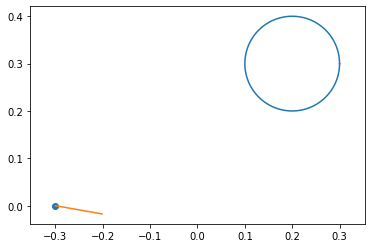

In [ ]:
#@title # Interactive Example  { run: "auto" }
origin_x = -0.3 #@param {type:"slider", min:-0.5, max:0.5, step:0.1}
origin_y = 0 #@param {type:"slider", min:-0.5, max:0.5, step:0.1}
angle = -10 #@param {type:"slider", min:-180, max:180, step:10}

center = np.array([.2, .3])
radius = .1

ray_o = np.array([origin_x, origin_y])
rth = angle / 180. * np.pi
dx, dy = np.cos(rth), np.sin(rth)
ray_d = np.array([dx, dy])

a = np.dot(ray_d, ray_d)
b = 2 * np.dot(ray_o - center, ray_d)
c = np.dot(ray_o - center, ray_o - center) - radius ** 2

discr = b**2 - 4*a*c

t = None
if discr == 0.:
    t = -b / (2. * a)
    if t < 0:
      t = None
elif discr > 0.:
    discr = np.sqrt(discr)
    t_vals = [(-b - discr) / (2. * a), (-b + discr) / (2. * a)]
    if t_vals[0] >= 0:
      t = t_vals[0]
    elif t_vals[1] >= 0:
      t = t_vals[1]
    else:
      t = None


th = np.linspace(0., 1., 256+1) * 2. * np.pi
circle_pts = center + radius * np.stack([np.cos(th), np.sin(th)], -1)

plt.figure(2)
plt.plot(*circle_pts.T)
plt.scatter(*ray_o)
plt.plot(*np.stack([ray_o, ray_o + .1 * ray_d]).T)
if t is not None:
    plt.scatter(*(ray_o + t * ray_d))
plt.axis('equal')
plt.show()
